In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('olympics.csv', skiprows = 4)
df.head(3)

,City,Edition,Sport,Discipline,Athlete,NOC,Gender,Event,Event_gender,Medal
0,Athens,1896,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100m freestyle,M,Gold
1,Athens,1896,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100m freestyle,M,Silver
2,Athens,1896,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100m freestyle for sailors,M,Bronze


# Task 1
## Plot the number of gold medals by the US male and female athletes throughout the history of the Olympics

In [3]:
analysis = df[(df.NOC == 'USA') & (df.Medal == 'Gold')]
analysis.head(3)

,City,Edition,Sport,Discipline,Athlete,NOC,Gender,Event,Event_gender,Medal
13,Athens,1896,Athletics,Athletics,"BURKE, Thomas",USA,Men,100m,M,Gold
15,Athens,1896,Athletics,Athletics,"CURTIS, Thomas",USA,Men,110m hurdles,M,Gold
21,Athens,1896,Athletics,Athletics,"BURKE, Thomas",USA,Men,400m,M,Gold


In [4]:
men_women = analysis.groupby(['Edition', 'Gender']).size()
men_women.head(3)

Edition  Gender
1896     Men       11
1900     Men       26
         Women      1
dtype: int64

In [5]:
result = men_women.unstack('Gender', fill_value=0)
result.head(3)

Gender,Men,Women
Edition,,
1896,11,0
1900,26,1
1904,140,6


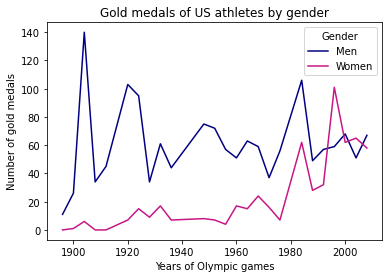

In [6]:
plot = result.plot(kind = 'line', 
            color = ['navy', 'mediumvioletred'], 
            title = 'Gold medals of US athletes by gender')
plot.set(xlabel="Years of Olympic games", ylabel="Number of gold medals");

# Task 2
## Plot the five athletes who have won the most gold medals over the history of the Olympics. When there is a tie, consider the number of silver medals and then bronze medals

In [7]:
analysis = df[['Athlete', 'Medal']]
analysis.head(3)

,Athlete,Medal
0,"HAJOS, Alfred",Gold
1,"HERSCHMANN, Otto",Silver
2,"DRIVAS, Dimitrios",Bronze


In [8]:
result = analysis.groupby(['Athlete', 'Medal']).size().unstack('Medal', fill_value = 0).sort_values(by = ['Gold', 'Silver', 'Bronze'], ascending = False)
result.head(3)

Medal,Bronze,Gold,Silver
Athlete,,,
"PHELPS, Michael",2,14,0
"LATYNINA, Larisa",4,9,5
"NURMI, Paavo",0,9,3


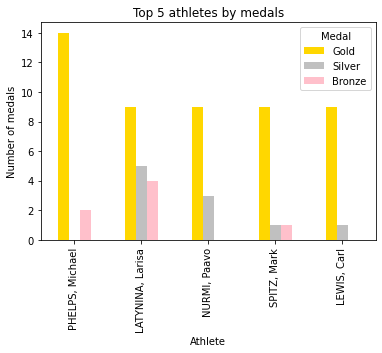

In [9]:
plot = result.head(5)[['Gold', 'Silver', 'Bronze']].plot(kind = 'bar',
                        color = ['gold', 'silver', 'pink'],
                        title = 'Top 5 athletes by medals')
plot.set(xlabel = 'Athlete', ylabel = 'Number of medals');